# 🌍 Air Quality Assessment Dataset

## 📌 Overview
This dataset focuses on **air quality assessment** across various regions.  
It contains **5000 samples**, capturing critical **environmental** and **demographic** factors that influence pollution levels.

The dataset can be used for:
- Environmental data analysis
- Air pollution prediction models
- Machine learning classification tasks
- Public health monitoring systems

---

## 📊 Key Features

### 🌡️ Temperature (°C)
- Average temperature of the region.

### 💧 Humidity (%)
- Relative humidity recorded in the region.

### 🌫️ PM2.5 Concentration (µg/m³)
- Fine particulate matter levels.
- Particles smaller than 2.5 micrometers.
- Highly harmful to human health.

### 🌪️ PM10 Concentration (µg/m³)
- Coarse particulate matter levels.
- Particles smaller than 10 micrometers.

### 🏭 NO2 Concentration (ppb)
- Nitrogen dioxide levels.
- Commonly emitted from vehicles and industrial activities.

### 🏗️ SO2 Concentration (ppb)
- Sulfur dioxide levels.
- Mainly produced by burning fossil fuels and industrial processes.

### 🚗 CO Concentration (ppm)
- Carbon monoxide levels.
- Toxic gas resulting from incomplete combustion.

### 🏢 Proximity to Industrial Areas (km)
- Distance to the nearest industrial zone.
- Shorter distance may indicate higher pollution exposure.

### 👥 Population Density (people/km²)
- Number of people per square kilometer in the region.
- Higher density may correlate with increased pollution levels.

---

## 🎯 Target Variable: Air Quality Levels

The dataset classifies air quality into four categories:

### 🟢 Good
- Clean air with low pollution levels.

### 🟡 Moderate
- Acceptable air quality with some pollutants present.

### 🟠 Poor
- Noticeable pollution.
- May cause health issues for sensitive groups.

### 🔴 Hazardous
- Extremely polluted air.
- Serious health risks for the general population.

---

## 🧠 Problem Type

- **Machine Learning Task:** Classification  
- **Category Type:** Multiclass Classification (4 classes)

---

## 🚀 Possible Use Cases

- Building air quality prediction models
- Developing environmental monitoring dashboards
- Health risk assessment systems
- Smart city pollution tracking applications

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('updated_pollution_dataset.csv')

In [6]:
df

Temperature  Humidity  PM2.5   PM10   NO2   SO2    CO  \
0            29.8      59.1    5.2   17.9  18.9   9.2  1.72   
1            28.3      75.6    2.3   12.2  30.8   9.7  1.64   
2            23.1      74.7   26.7   33.8  24.4  12.6  1.63   
3            27.1      39.1    6.1    6.3  13.5   5.3  1.15   
4            26.5      70.7    6.9   16.0  21.9   5.6  1.01   
...           ...       ...    ...    ...   ...   ...   ...   
4995         40.6      74.1  116.0  126.7  45.5  25.7  2.11   
4996         28.1      96.9    6.9   25.0  25.3  10.8  1.54   
4997         25.9      78.2   14.2   22.1  34.8   7.8  1.63   
4998         25.3      44.4   21.4   29.0  23.7   5.7  0.89   
4999         24.1      77.9   81.7   94.3  23.2  10.5  1.38   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                               6.3                 319    Moderate  
1                               6.0                 611    Moderate  
2                               5.2                 619    Moderate  
3                              11.1                 551        Good  
4                              12.7                 303        Good  
...                             ...                 ...         ...  
4995                            2.8                 765   Hazardous  
4996                            5.7                 709    Moderate  
4997                            9.6                 379    Moderate  
4998                           11.6                 241        Good  
4999                            8.3                 461    Moderate  

[5000 rows x 10 columns]

In [7]:
df.head()

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [9]:
df["Air Quality"].value_counts()

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

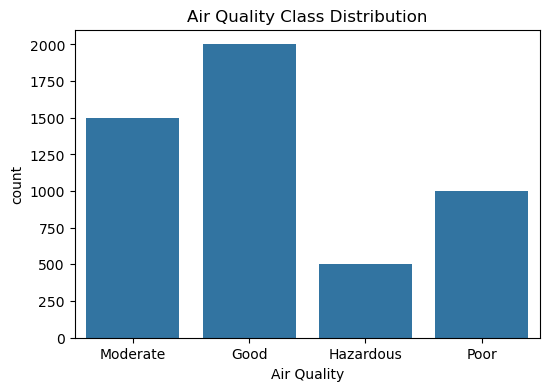

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x="Air Quality", data=df)
plt.title("Air Quality Class Distribution")
plt.show()

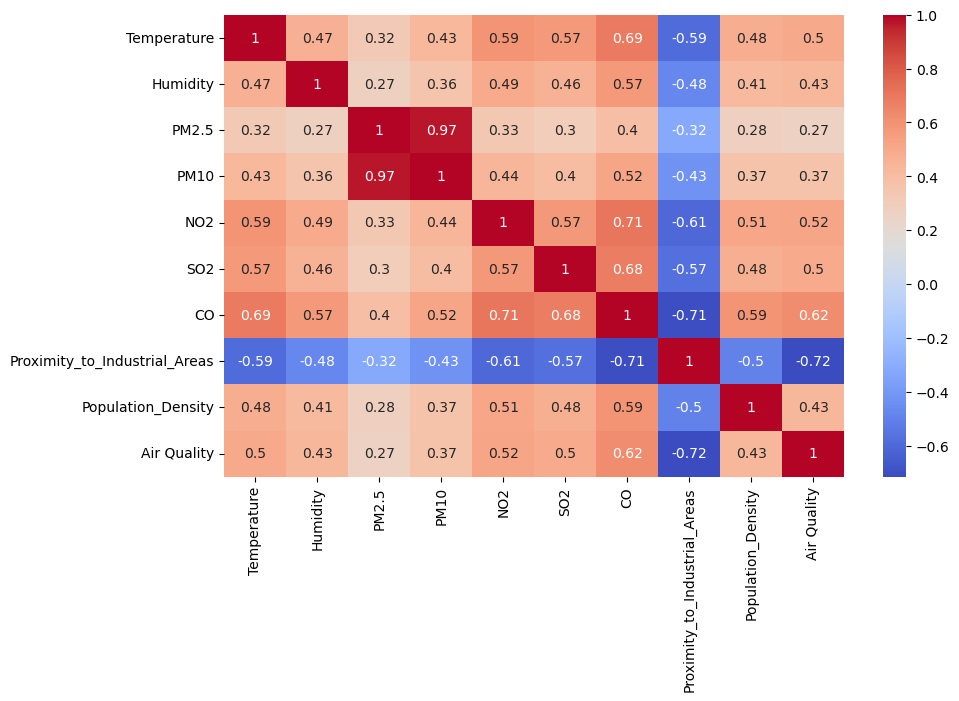

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

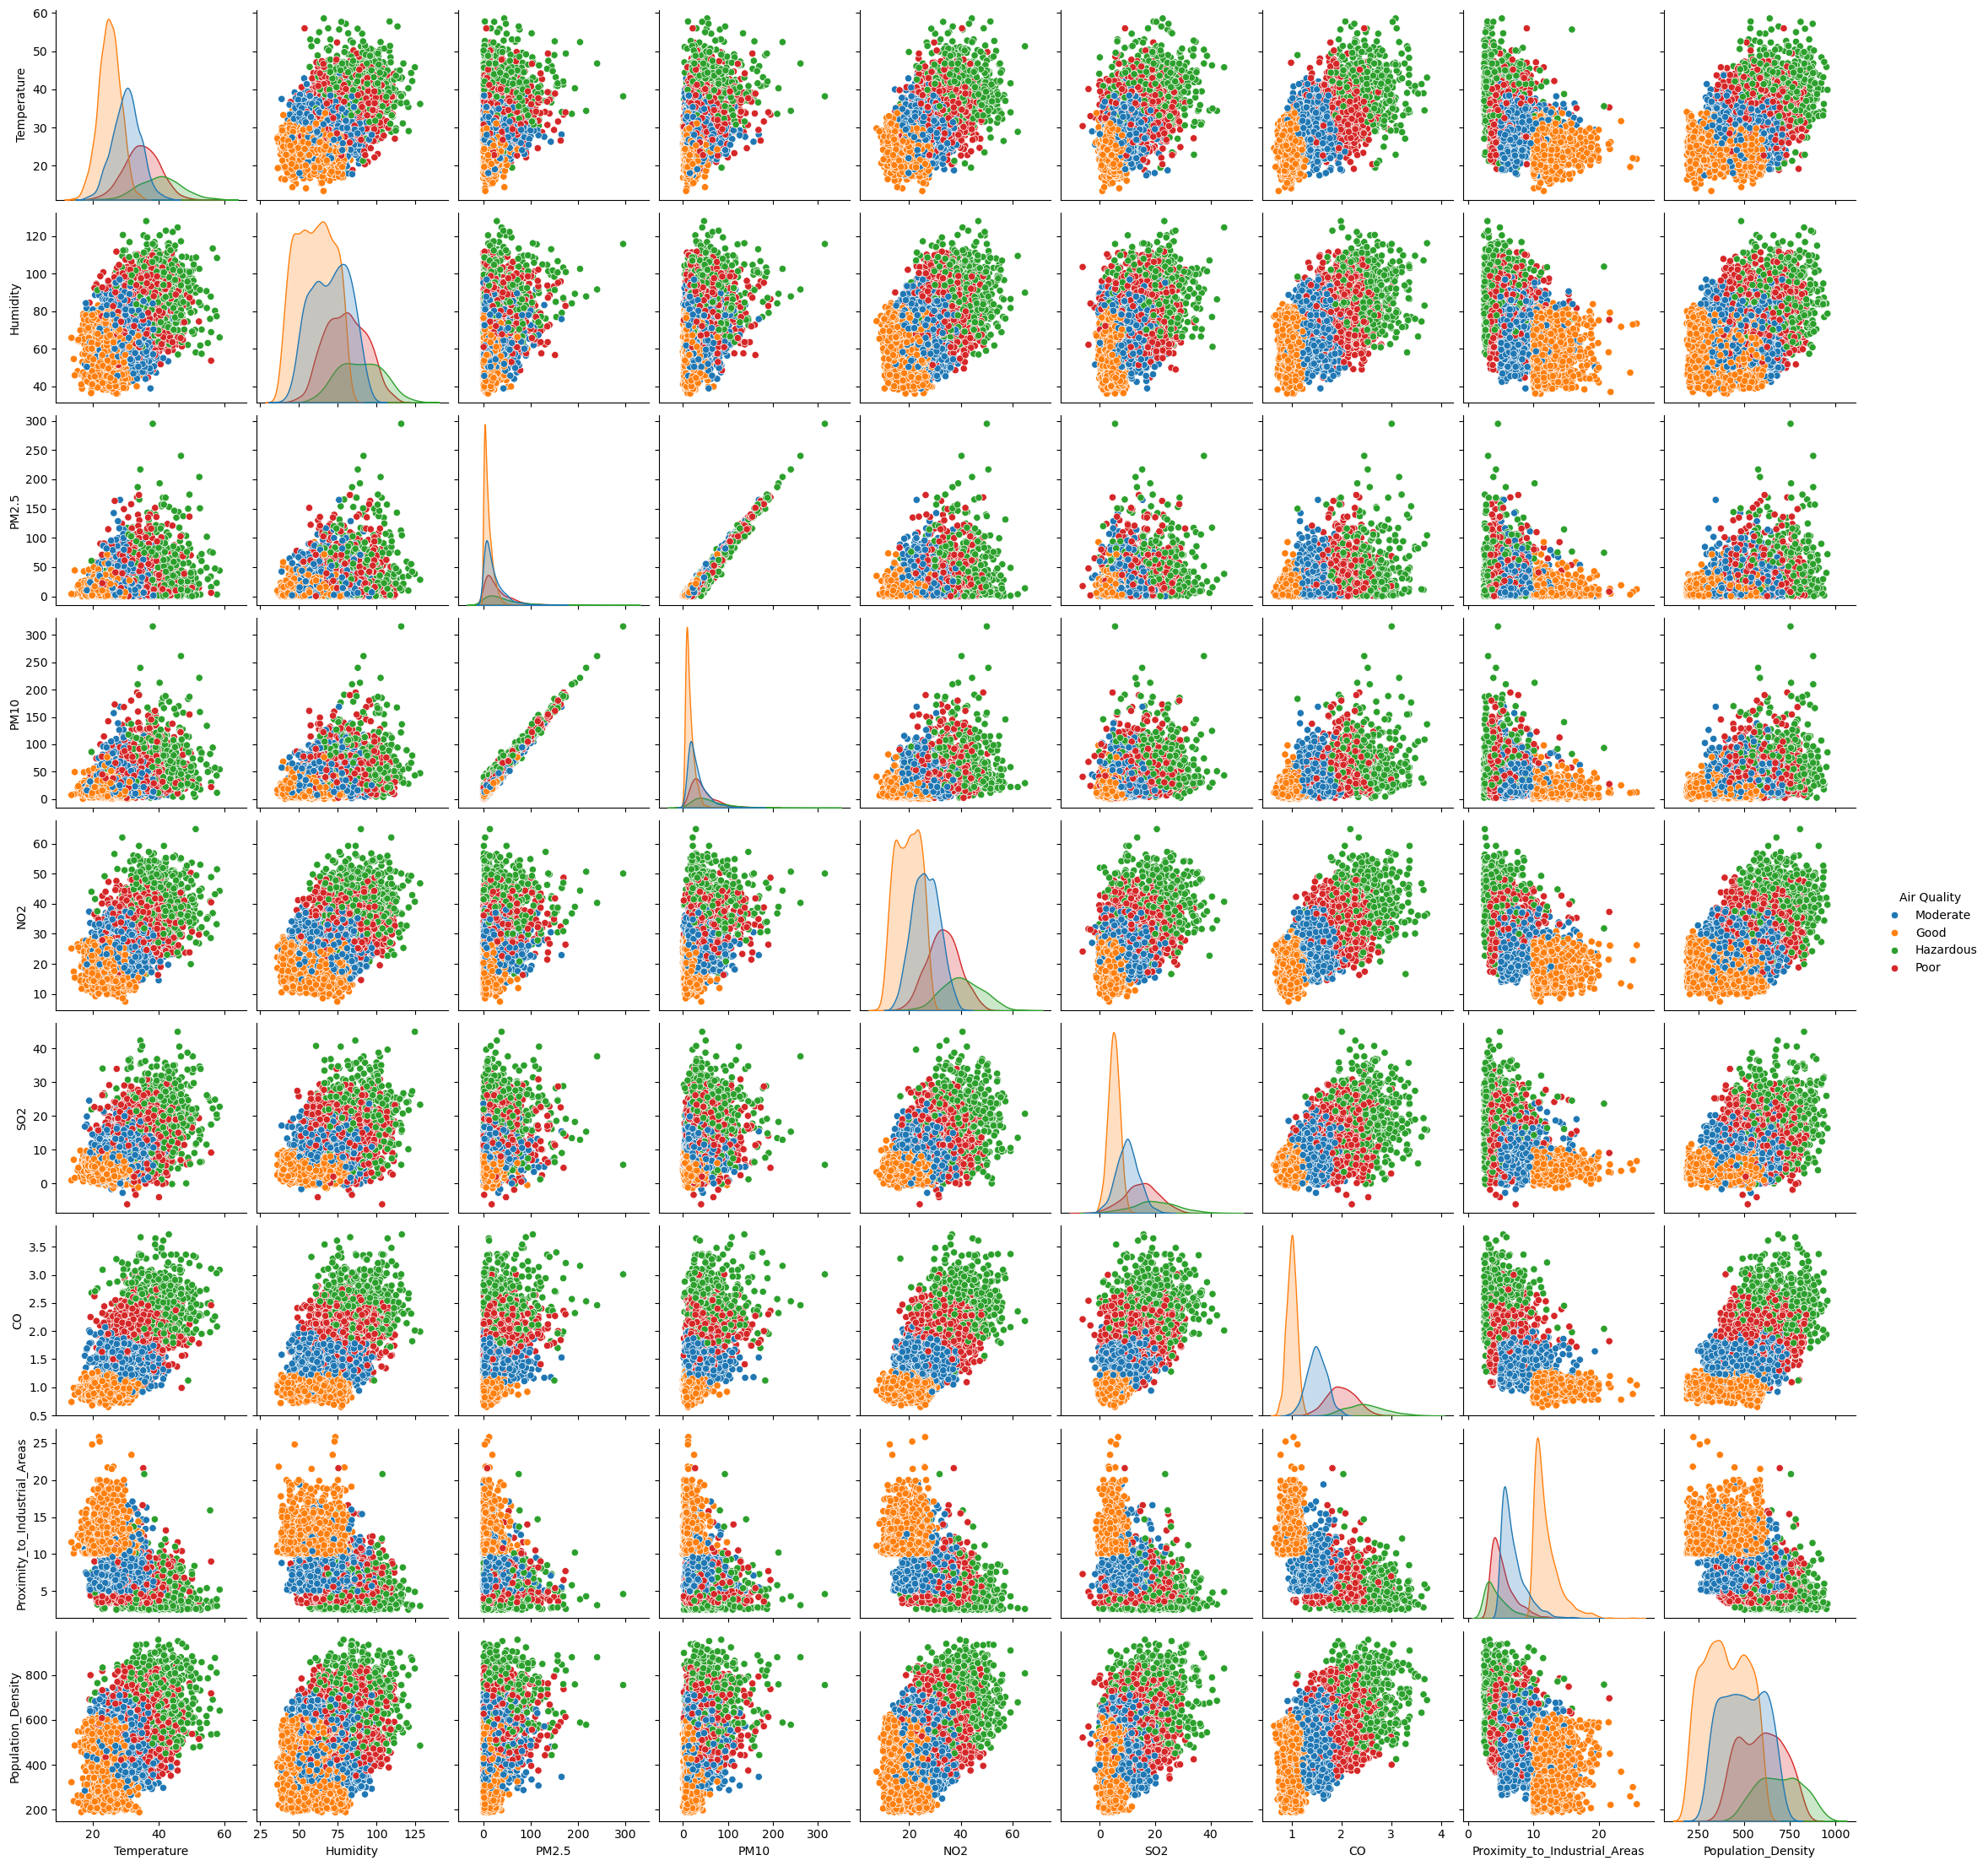

In [22]:
sns.pairplot(df, hue="Air Quality")

In [13]:
numeric_cols = df.select_dtypes(include=np.number).columns

outliers_dict = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outliers_dict[col] = outliers

    print(f"{col} → ", len(outliers))

Temperature →  72
Humidity →  19
PM2.5 →  352
PM10 →  324
NO2 →  73
SO2 →  124
CO →  45
Proximity_to_Industrial_Areas →  16
Population_Density →  7


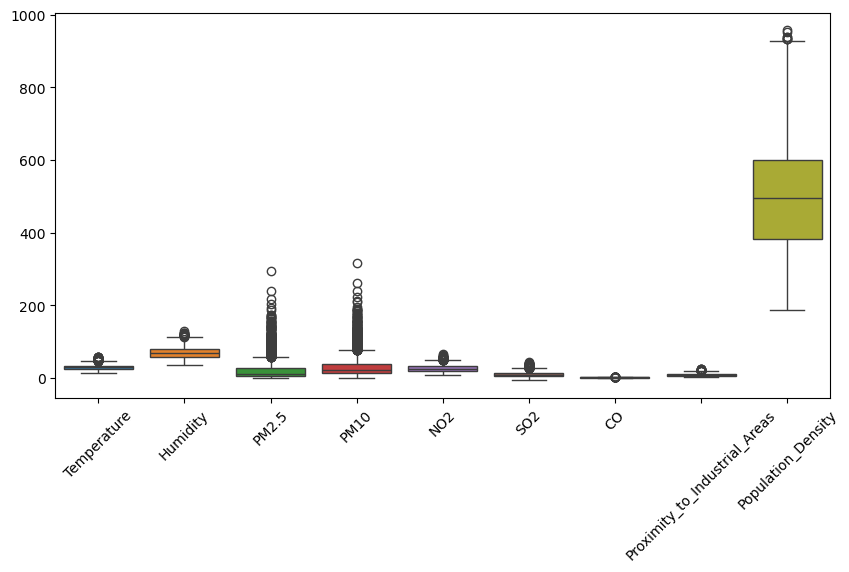

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Air Quality', ylabel='PM2.5'>

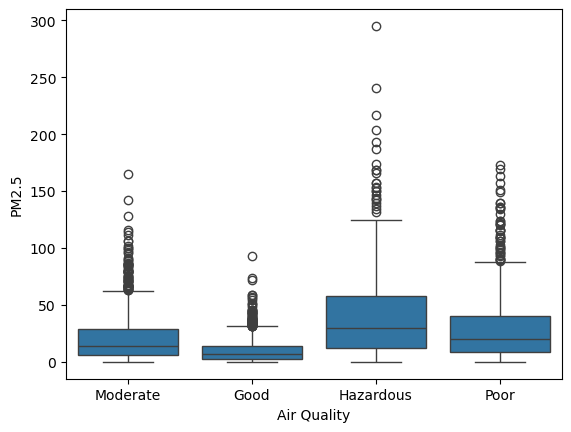

In [15]:
sns.boxplot(x="Air Quality", y="PM2.5", data=df)

<Axes: xlabel='Air Quality', ylabel='PM10'>

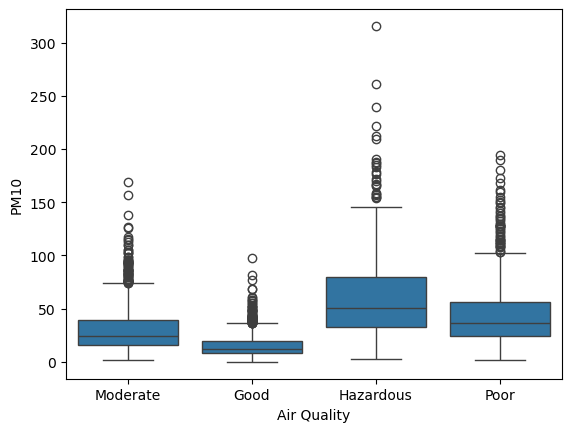

In [16]:
sns.boxplot(x="Air Quality", y="PM10", data=df)

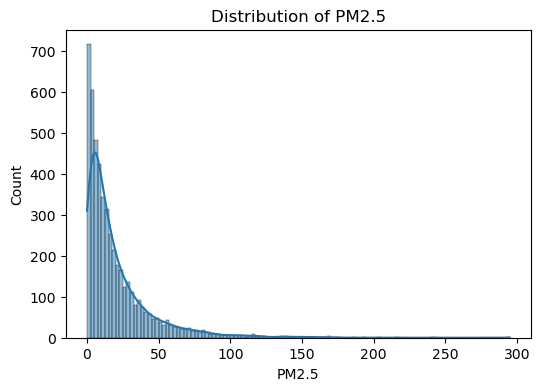

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df["PM2.5"], kde=True)
plt.title("Distribution of PM2.5")
plt.show()

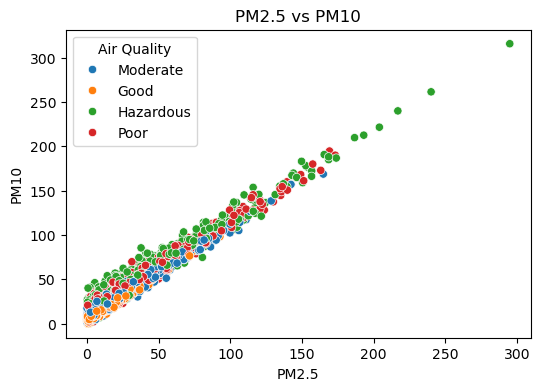

In [19]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="PM2.5", y="PM10", hue="Air Quality", data=df)
plt.title("PM2.5 vs PM10")
plt.show()

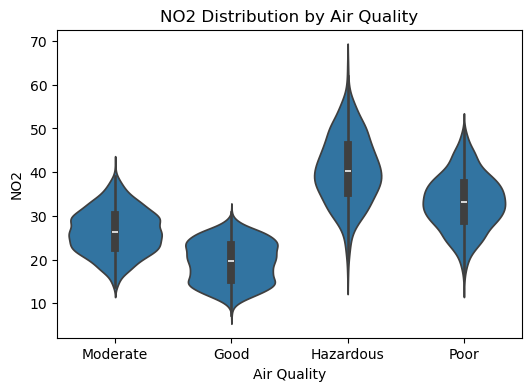

In [20]:
plt.figure(figsize=(6,4))
sns.violinplot(x="Air Quality", y="NO2", data=df)
plt.title("NO2 Distribution by Air Quality")
plt.show()

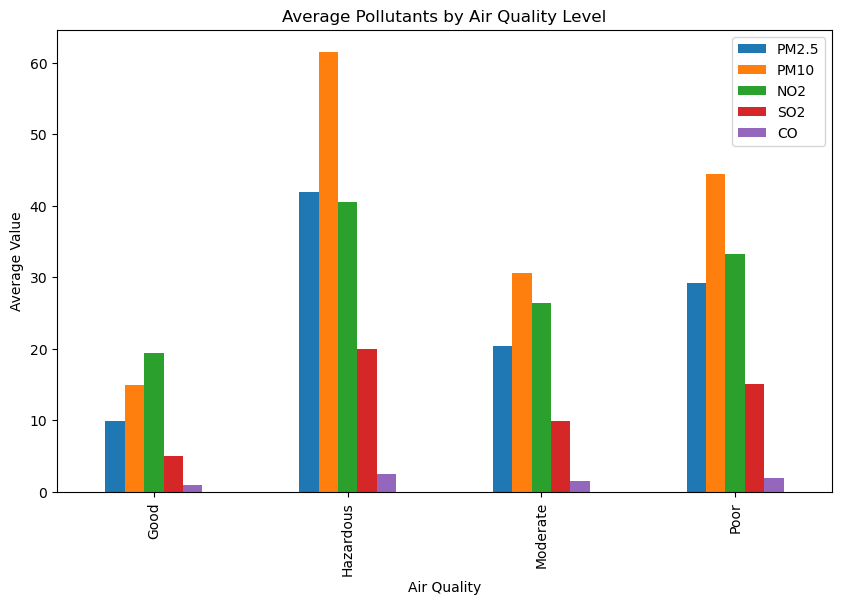

In [21]:
df.groupby("Air Quality")[["PM2.5","PM10","NO2","SO2","CO"]].mean().plot(kind="bar", figsize=(10,6))
plt.title("Average Pollutants by Air Quality Level")
plt.ylabel("Average Value")
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Air Quality"] = le.fit_transform(df["Air Quality"])

print(le.classes_)

['Good' 'Hazardous' 'Moderate' 'Poor']


In [24]:
from sklearn.model_selection import train_test_split

X = df.drop("Air Quality", axis=1)
y = df["Air Quality"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [25]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Bagging": BaggingClassifier(
        estimator=DecisionTreeClassifier(max_depth=10),
        n_estimators=50,
        random_state=42
    ),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "HistGradientBoosting": HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, eval_metric='mlogloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, iterations=100, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}


results = []

for model_name, model in models.items():

    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)

    Acc_Train = accuracy_score(y_train, y_pred_train)
    Acc_Test  = accuracy_score(y_test, y_pred_test)

    Pre_Train = precision_score(y_train, y_pred_train, average='weighted')
    Pre_Test  = precision_score(y_test, y_pred_test, average='weighted')

    Rec_Train = recall_score(y_train, y_pred_train, average='weighted')
    Rec_Test  = recall_score(y_test, y_pred_test, average='weighted')

    F1_Train  = f1_score(y_train, y_pred_train, average='weighted')
    F1_Test   = f1_score(y_test, y_pred_test, average='weighted')

    results.append([model_name,
                    Acc_Train, Pre_Train, Rec_Train, F1_Train,
                    Acc_Test, Pre_Test, Rec_Test, F1_Test])

results_df = pd.DataFrame(results, columns=[
    "Model",
    "Acc_Train","Pre_Train","Rec_Train","F1_Train",
    "Acc_Test","Pre_Test","Rec_Test","F1_Test"
]).sort_values(by="F1_Test", ascending=False)

print(results_df)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2188
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 9
[LightGBM] [Info] Start training from score -0.916291
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -1.203973
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
                  Model  Acc_Train  Pre_Train  Rec_Train  F1_Train  Acc_Test  \
1            ExtraTrees    1.00000   1.000000    1.00000  1.000000     0.955   
8              LightGBM    1.00000   1.000000    1.00000  1.000000     0.953   
5  HistGradientBoosting    1.00000   1.000000    1.00000  1.000000     0.953   
0         Random Forest    0.98650   0

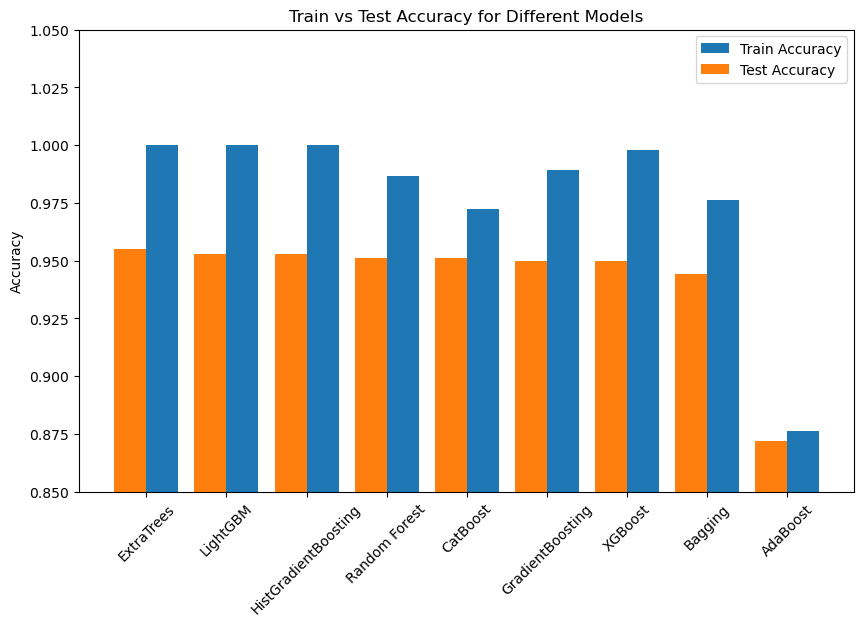

In [ ]:
plt.figure(figsize=(10,6))

plt.bar(results_df["Model"], results_df["Acc_Train"], width=0.4, label="Train Accuracy", align='edge')
plt.bar(results_df["Model"], results_df["Acc_Test"], width=-0.4, label="Test Accuracy", align='edge')

plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy for Different Models")
plt.ylim(0.85,1.05)
plt.legend()
plt.show()

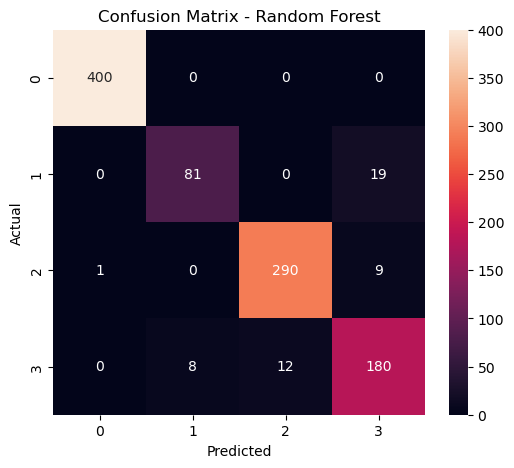

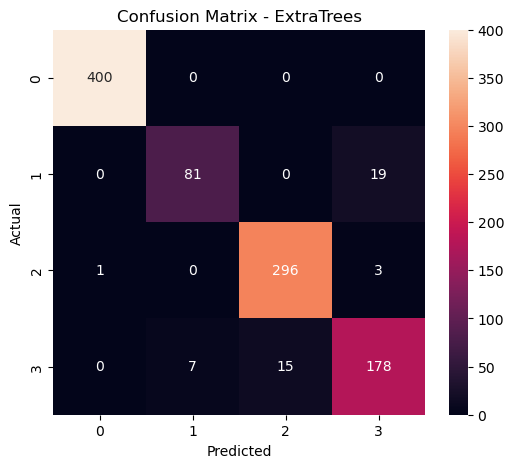

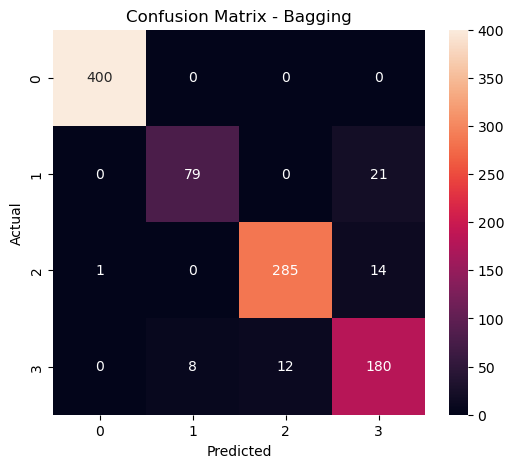

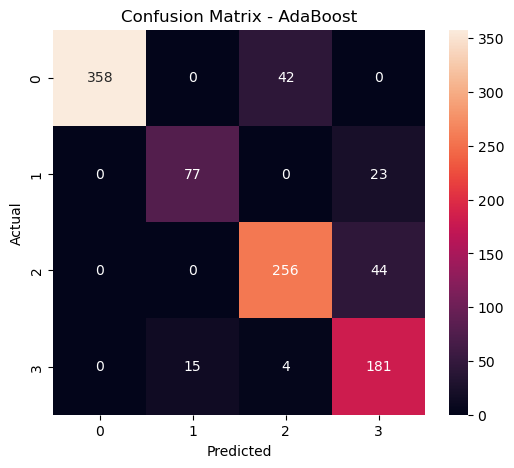

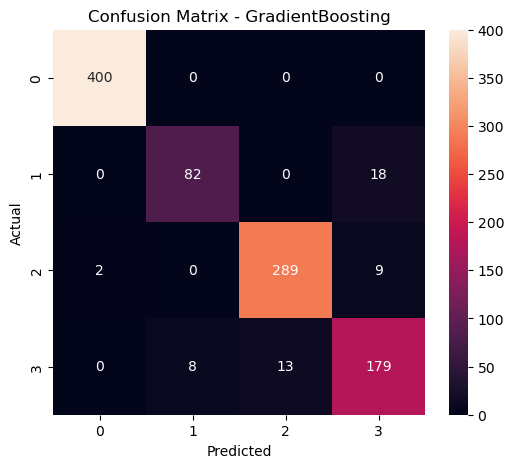

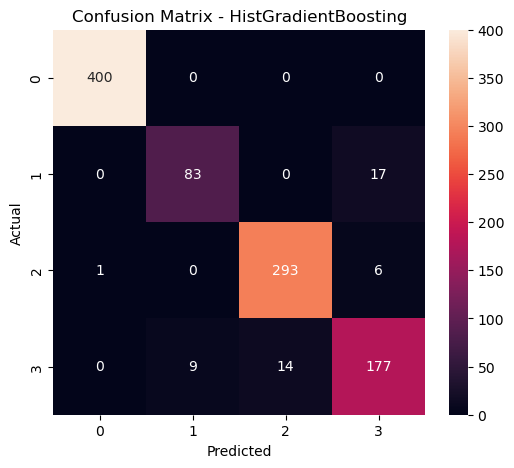

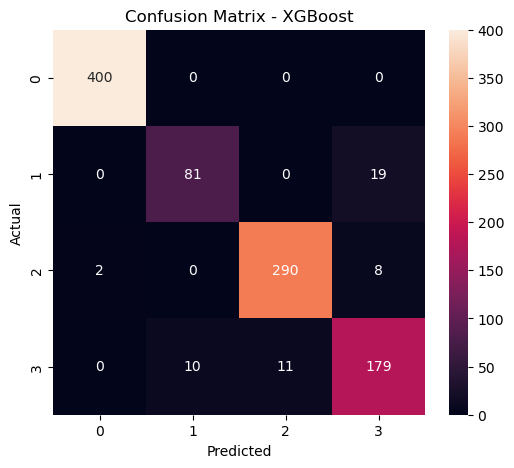

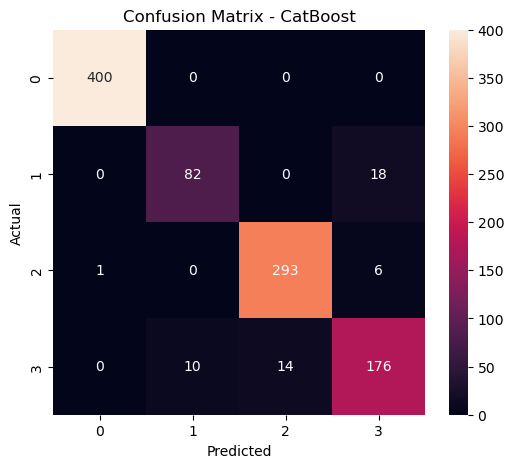

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2188
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 9
[LightGBM] [Info] Start training from score -0.916291
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -1.203973
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


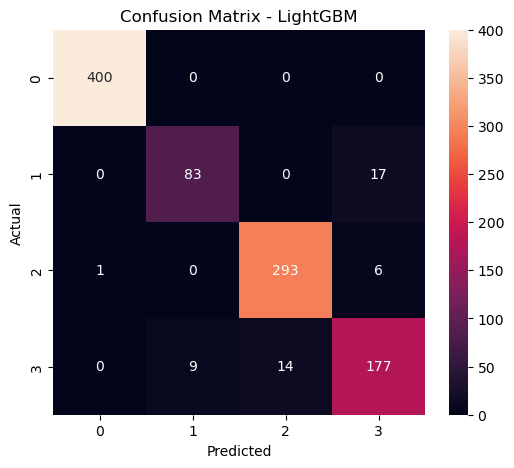

In [27]:
for model_name, model in models.items():

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2188
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 9
[LightGBM] [Info] Start training from score -0.916291
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -1.203973
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


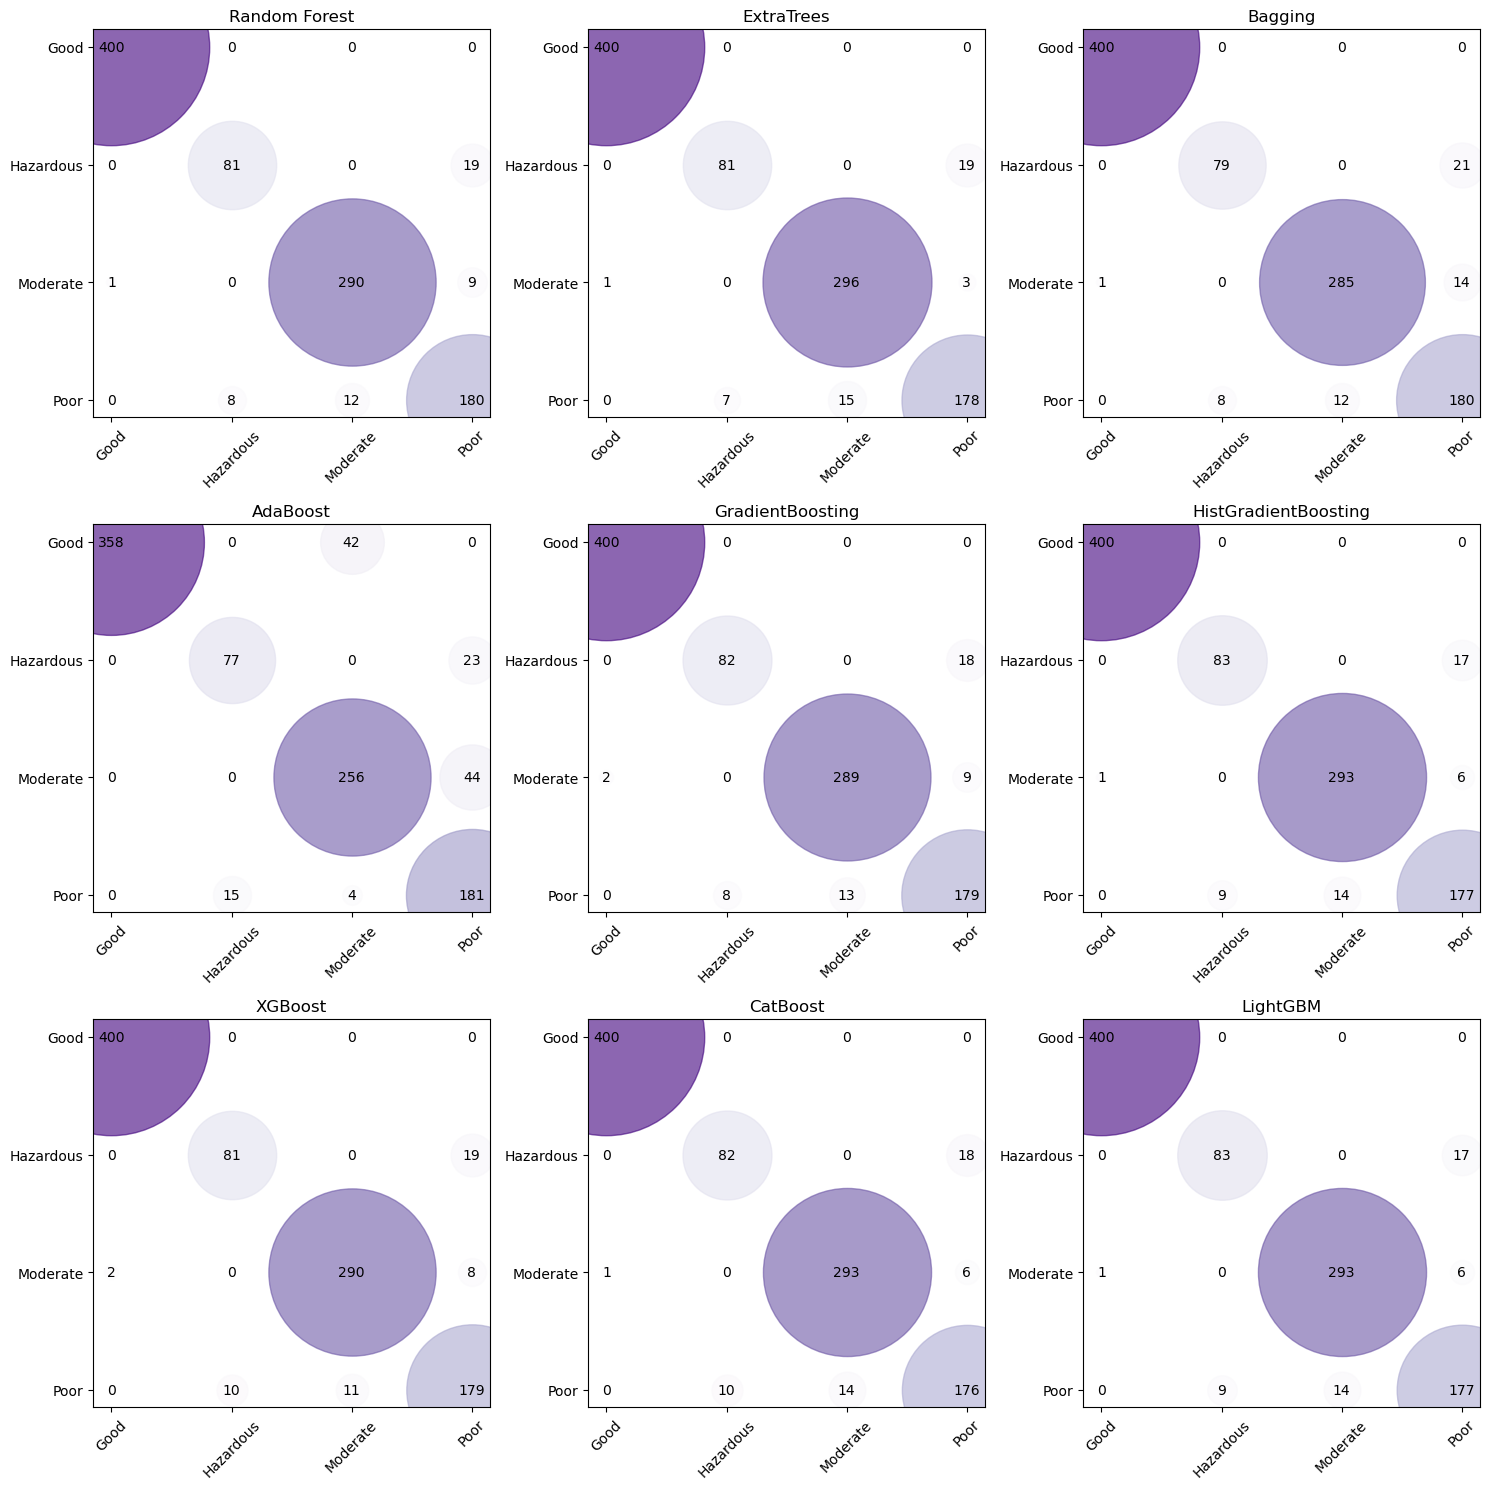

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

n_models = len(models)
n_cols = 3
n_rows = int(np.ceil(n_models / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5))
axes = axes.flatten()

for idx, (model_name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    classes = le.classes_
    
    # Flatten cm for colors
    for i in range(len(classes)):
        for j in range(len(classes)):
            color_val = cm[i,j]
            axes[idx].scatter(j, i, s=cm[i,j]*50, c=[color_val], cmap='Purples', alpha=0.6, vmin=0, vmax=cm.max())
            axes[idx].text(j, i, str(cm[i,j]), ha='center', va='center', color='black', fontsize=10)
    
    axes[idx].set_xticks(np.arange(len(classes)))
    axes[idx].set_yticks(np.arange(len(classes)))
    axes[idx].set_xticklabels(classes, rotation=45)
    axes[idx].set_yticklabels(classes)
    axes[idx].set_title(model_name)
    axes[idx].invert_yaxis()

# إزالة أي subplot فارغ
for j in range(idx+1, n_rows*n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

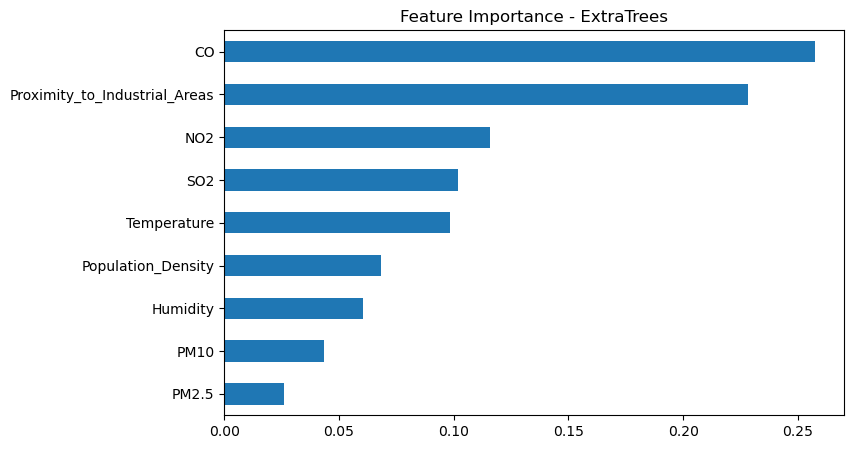

In [ ]:
feat_imp = pd.Series(models['ExtraTrees'].feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind='barh', figsize=(8,5))
plt.title("Feature Importance - ExtraTrees")
plt.show()

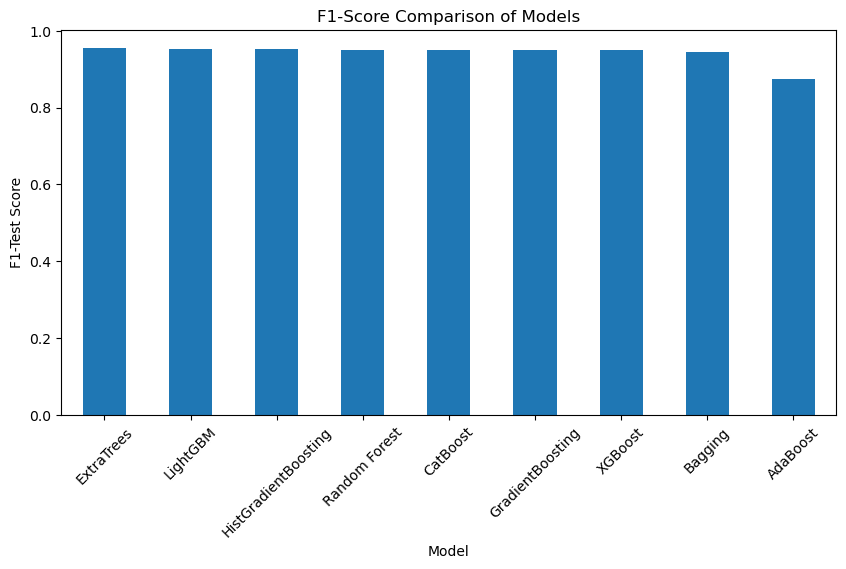

In [31]:
results_df.plot(x="Model", y="F1_Test", kind="bar", figsize=(10,5), legend=False)
plt.title("F1-Score Comparison of Models")
plt.ylabel("F1-Test Score")
plt.xticks(rotation=45)
plt.show()

In [28]:
best_model_name = results_df.iloc[0]["Model"]
print("Best Model is:", best_model_name)

Best Model is: ExtraTrees


In [43]:
import joblib

best_model = models[best_model_name]
best_model.fit(X_train, y_train)
joblib.dump(best_model, 'best_air_quality_model.pkl')



['best_air_quality_model.pkl']

In [42]:
joblib.dump(RobustScaler, 'scaler.pkl')

['scaler.pkl']